In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm 

from scipy.stats import shapiro,kstest,normaltest,skew

import pickle
import json

### 1.Problem  Statement

### 2.Data Gathering

In [81]:
df=pd.read_csv("car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 3. Exploratory Data Analysis(EDA)¶

In [83]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [84]:
df.Car_Name.value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [85]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [86]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

### 4. Feature Engineering

##### Encoding

In [87]:
df = pd.get_dummies(df,columns=['Fuel_Type'], dtype = int)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,0,1,0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,0,0,1
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,0,0,1
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,0,1,0


In [9]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [88]:
df["Seller_Type"].replace({"Dealer":1 ,"Individual":0},inplace=True)

In [91]:
new_data1={"Dealer":1 ,"Individual":0}

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          301 non-null    object 
 1   Year              301 non-null    int64  
 2   Selling_Price     301 non-null    float64
 3   Present_Price     301 non-null    float64
 4   Kms_Driven        301 non-null    int64  
 5   Seller_Type       301 non-null    int64  
 6   Transmission      301 non-null    object 
 7   Owner             301 non-null    int64  
 8   Fuel_Type_CNG     301 non-null    int32  
 9   Fuel_Type_Diesel  301 non-null    int32  
 10  Fuel_Type_Petrol  301 non-null    int32  
dtypes: float64(2), int32(3), int64(4), object(2)
memory usage: 22.5+ KB


In [93]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [94]:
df["Transmission"].replace({"Manual":1, "Automatic":0},inplace=True)

In [95]:
new_data2={"Manual":1, "Automatic":0}

### 5. Feature Selection/Extraction

##### 5.1 Linearity

In [96]:
x=df.drop(["Car_Name"],axis=1)
x

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,1,1,0,0,0,1
1,2013,4.75,9.54,43000,1,1,0,0,1,0
2,2017,7.25,9.85,6900,1,1,0,0,0,1
3,2011,2.85,4.15,5200,1,1,0,0,0,1
4,2014,4.60,6.87,42450,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,0,1,0
297,2015,4.00,5.90,60000,1,1,0,0,0,1
298,2009,3.35,11.00,87934,1,1,0,0,0,1
299,2017,11.50,12.50,9000,1,1,0,0,1,0


In [97]:
x.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Year,1.000000,0.236141,-0.047584,-0.524342,0.039896,0.000394,-0.182104,-0.017790,0.064315,-0.059959
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.550724,-0.367128,-0.088344,-0.025164,0.552339,-0.540571
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.512030,-0.348715,0.008057,-0.011500,0.473306,-0.465244
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.101419,-0.162510,0.089216,0.012223,0.172515,-0.172874
Seller_Type,0.039896,0.550724,0.512030,0.101419,1.000000,-0.063240,-0.124269,0.060300,0.350467,-0.358321
Transmission,0.000394,-0.367128,-0.348715,-0.162510,-0.063240,1.000000,-0.050316,0.032018,-0.098643,0.091013
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.124269,-0.050316,1.000000,-0.014272,-0.053469,0.055687
Fuel_Type_CNG,-0.017790,-0.025164,-0.011500,0.012223,0.060300,0.032018,-0.014272,1.000000,-0.040808,-0.160577
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,0.350467,-0.098643,-0.053469,-0.040808,1.000000,-0.979648
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,-0.358321,0.091013,0.055687,-0.160577,-0.979648,1.000000


<Axes: >

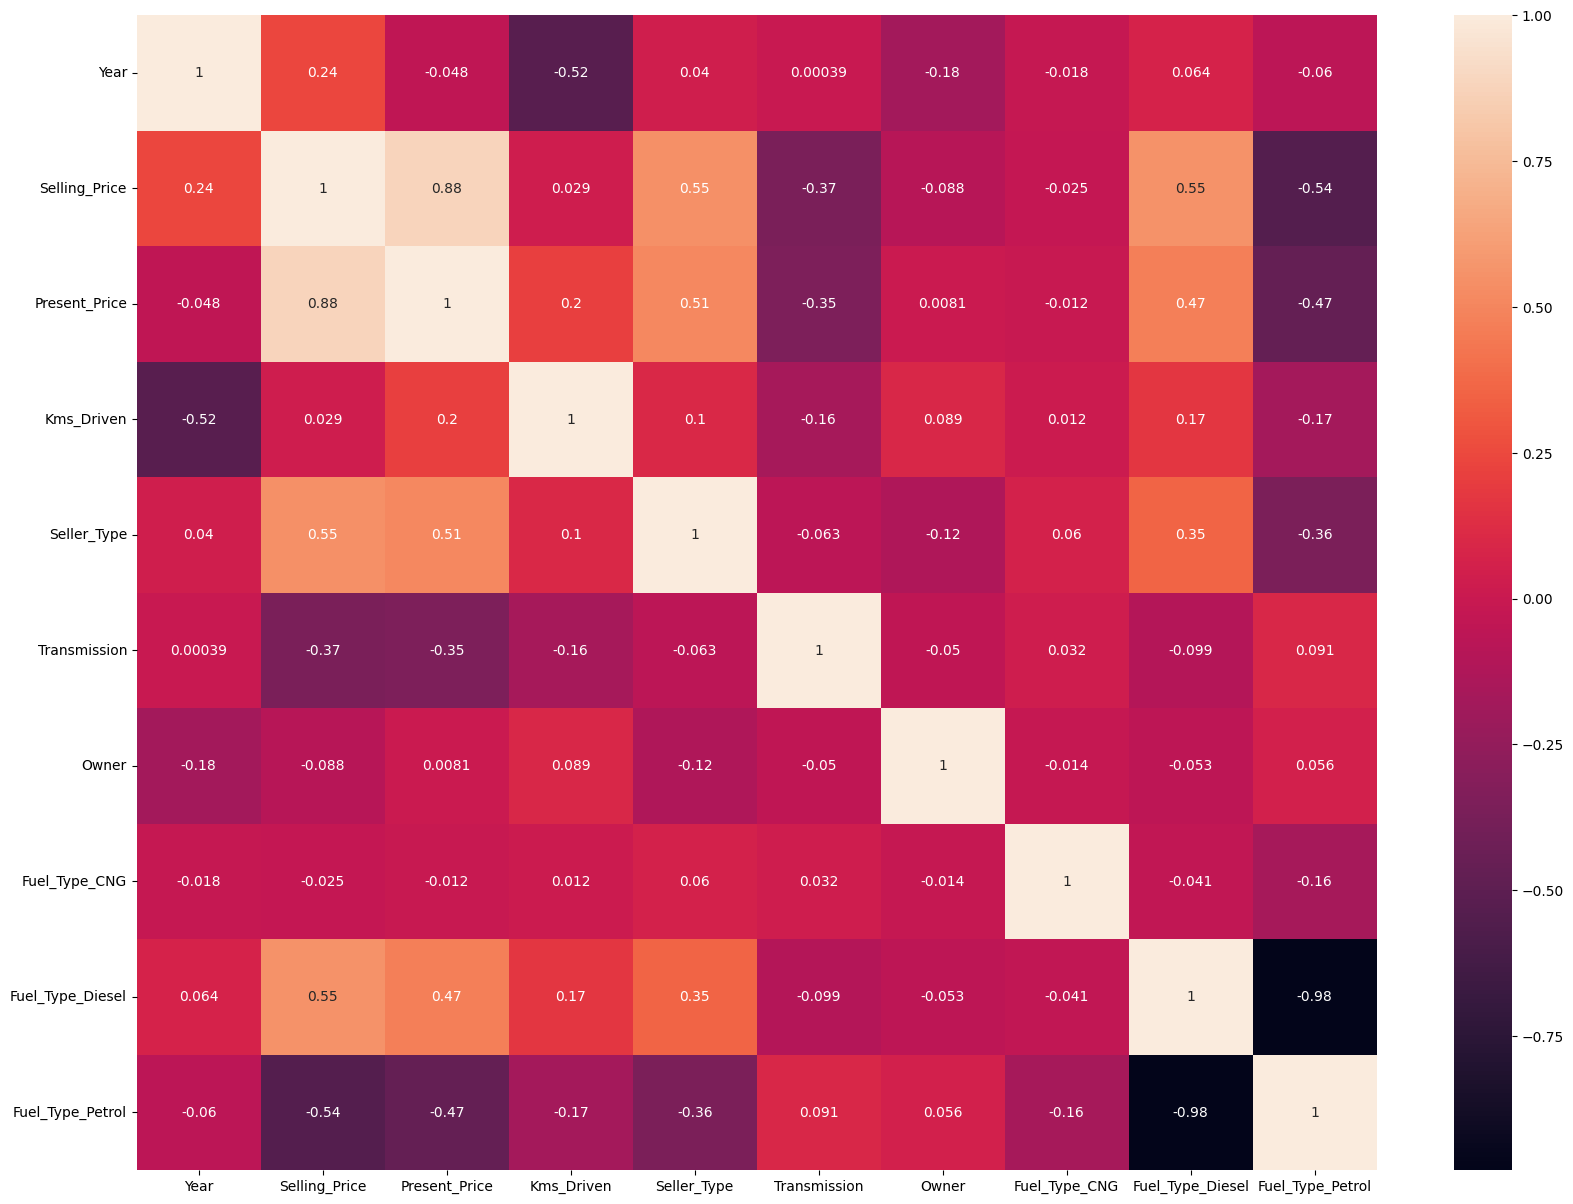

In [98]:
plt.figure(figsize = (20,15))
sns.heatmap(x.corr(), annot = True)

<Axes: >

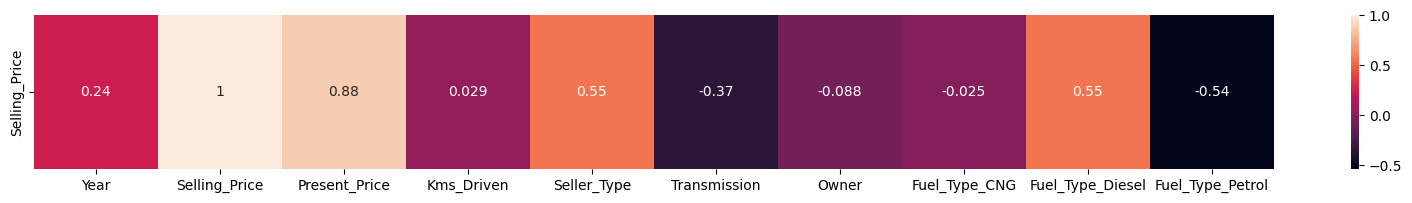

In [99]:
plt.figure(figsize = (20,2))
sns.heatmap(x.corr().iloc[1:2], annot = True)

#### 5.2 VIF (No Multicolliarity)

In [101]:
x=df.drop(["Selling_Price","Car_Name"],axis=1)
y=df["Selling_Price"]

In [102]:
array=x.values   # >>to_numpy
array.ndim

2

In [103]:
variance_inflation_factor(array,0)

1.4823467547289384

In [104]:
variance_inflation_factor(array,1)

1.8369267328238554

In [105]:
x.shape[1]

9

In [106]:
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Seller_Type', 'Transmission',
       'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [107]:
vif_list=[]

for i in range (x.shape[1]):
    vif=variance_inflation_factor(array,i)
    vif_list.append(vif)

    
vif_values = pd.Series(vif_list, index = x.columns)
vif_values

Year                     1.482347
Present_Price            1.836927
Kms_Driven               1.517916
Seller_Type              1.449644
Transmission             1.196263
Owner                    1.056734
Fuel_Type_CNG         4802.039004
Fuel_Type_Diesel    144232.562611
Fuel_Type_Petrol    573872.238016
dtype: float64

<Axes: >

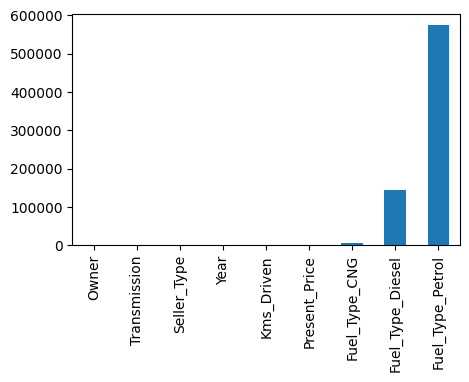

In [108]:
plt.figure(figsize = (5,3))
vif_values.sort_values().plot(kind="bar")

### 6. Model Training

In [109]:
x=df.drop(["Selling_Price","Car_Name"],axis=1)
y=df["Selling_Price"]

#### train test split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [111]:
x_test

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
150,2011,0.826,6000,0,1,0,0,0,1
12,2015,9.940,15000,1,0,0,0,0,1
294,2014,6.800,33019,1,1,0,0,0,1
295,2015,13.090,60076,1,1,0,0,1,0
60,2013,18.610,40001,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
212,2016,13.600,22671,1,1,0,0,0,1
262,2015,5.800,40023,1,1,0,0,0,1
70,2014,6.760,71000,1,1,0,0,1,0
202,2015,5.700,28200,1,1,0,0,0,1


In [112]:
y_test

150     0.50
12      7.50
294     3.75
295     8.55
60      6.95
       ...  
212    11.25
262     4.00
70      3.95
202     4.40
170     0.40
Name: Selling_Price, Length: 61, dtype: float64

In [113]:
x_train

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
159,2017,0.510,4000,0,0,0,0,0,1
44,2012,2.690,50000,1,1,0,0,0,1
254,2013,9.900,54242,1,1,0,0,0,1
97,2017,18.640,8700,1,1,0,0,0,1
123,2013,1.470,46500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
161,2014,0.826,23000,0,1,0,0,0,1
269,2015,10.000,18828,1,1,0,0,0,1
91,2014,16.090,58242,1,1,0,0,1,0
80,2016,14.890,23000,1,1,0,0,1,0


In [114]:
y_train

159     0.45
44      1.25
254     5.25
97     17.00
123     1.00
       ...  
161     0.45
269     6.70
91     11.25
80     14.73
191     0.20
Name: Selling_Price, Length: 240, dtype: float64

### Instantiating linear reg model

In [115]:
liner_reg=LinearRegression()
liner_reg

LinearRegression()

In [116]:
liner_reg.fit(x_train,y_train)

LinearRegression()

In [117]:
np.around(liner_reg.coef_ ,3)

array([ 0.428,  0.537, -0.   ,  0.298, -0.526, -0.952, -0.808,  1.214,
       -0.406])

In [118]:
liner_reg.intercept_

-861.5703528086987

#### 7.model evaluaton

####  model evaluaton on testdata

In [119]:
y_pred=liner_reg.predict(x_test)
y_pred

array([-4.86736074e-01,  6.90294167e+00,  4.18099429e+00,  9.48235495e+00,
        1.00601273e+01,  2.63838220e+00, -3.41748690e+00,  2.12117547e+00,
        3.82148277e+00, -3.01907125e-02,  8.22630653e+00,  3.01574119e+00,
        3.35880926e+00,  2.17184292e+00, -7.58273588e-01, -6.25996436e-01,
        4.25606349e+00,  2.04897815e+00,  8.78810123e+00,  1.10892753e-01,
        8.33138202e+00,  4.69086178e+00,  4.68000545e+00,  7.22218186e+00,
        3.03772310e-01,  1.63893250e+00,  4.10858567e+00,  8.06894148e+00,
        6.53990618e+00,  4.99325817e+00,  8.18491022e-01,  1.79169207e+01,
        1.59796365e+00,  5.05813792e+00,  2.05704653e+00,  1.27072867e+01,
        1.98326628e+00,  1.15729718e+00,  4.93451825e+00,  4.99376155e+01,
        2.09426076e+00,  2.93766117e+00,  3.99413908e+00, -1.29040111e-01,
        2.60509110e+00,  4.14862437e+00,  9.51584072e+00,  9.22439112e+00,
        3.28643465e+00,  8.00281142e-01,  4.24093030e+00,  1.91859119e+00,
        1.46558853e+01,  

In [120]:
y_test[10:15]

257    8.50
201    3.25
204    2.75
126    0.90
193    0.20
Name: Selling_Price, dtype: float64

In [121]:
y_pred[10:15]

array([ 8.22630653,  3.01574119,  3.35880926,  2.17184292, -0.75827359])

#### residual of testdata

In [122]:
residual=y_test-y_pred
residual[10:15]

257    0.273693
201    0.234259
204   -0.608809
126   -1.271843
193    0.958274
Name: Selling_Price, dtype: float64

##### Testing data evaluation

In [123]:
y_pred=liner_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error      :",mse)

rmse=np.sqrt(mse)
print("root mean squared error :",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error     :",mae)

R2_value=r2_score(y_test,y_pred)
print("R-squared value is      :",R2_value)

n=x_test.shape[0]
k=x_test.shape[1]

adj_R2=1-((1-R2_value)*(n-1))/(n-k-1)
print("adjusted R-squared value:",adj_R2)

mean_squared_error      : 5.342666155762936
root mean squared error : 2.3114208088885366
mean_absolute_error     : 1.2358606640617453
R-squared value is      : 0.8429605348613081
adjusted R-squared value: 0.8152476880721271


#####  model evaluaton on traindata

In [124]:
y_pred_train=liner_reg.predict(x_train)
y_pred_train

array([ 2.44953889e+00,  1.04079610e+00,  5.32010539e+00,  1.19322488e+01,
        5.31784544e-01,  5.52180659e+00,  8.29594515e+00,  8.11479497e+00,
        1.59963315e+00,  6.81988797e+00,  9.19820386e-01,  3.15283281e+00,
        9.48626719e+00,  5.73680224e+00,  2.71488307e+00,  1.95040225e+01,
        4.75258196e+00,  5.12979960e+00,  2.52120072e+00,  1.78203438e-01,
        6.21667273e+00,  1.13364780e+01, -1.70809085e+00,  8.85048507e-01,
        3.84761155e+00,  5.02038577e+00,  7.32448281e+00,  1.83180123e+00,
        5.93134153e-01,  3.54451569e+00,  9.72009994e+00,  7.60172451e+00,
        4.05689080e+00,  8.09620797e+00,  2.36123038e+00,  4.00372784e+00,
        2.60509574e+00,  1.52045933e+00,  1.03716461e+00,  2.46180881e+00,
        1.96241367e+00,  7.43695162e+00,  1.46560798e+00,  5.99223911e+00,
        2.23439546e+01,  1.57665172e+00,  1.18541922e+00,  1.48687957e+01,
        7.31094792e+00,  8.31057817e+00,  6.34245306e+00,  1.02546554e+01,
        1.84013117e+00,  

In [125]:
y_train[10:15]

136    0.65
26     4.15
95     5.85
206    5.75
273    2.25
Name: Selling_Price, dtype: float64

In [126]:
y_pred_train[10:15]

array([0.91982039, 3.15283281, 9.48626719, 5.73680224, 2.71488307])

#### residual of traindata

In [127]:
residual_train=y_train - y_pred_train
residual_train[10:15]

136   -0.269820
26     0.997167
95    -3.636267
206    0.013198
273   -0.464883
Name: Selling_Price, dtype: float64

#### Training data evaluation

In [128]:
y_pred_train=liner_reg.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error      :",mse)

rmse=np.sqrt(mse)
print("root mean squared error :",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error     :",mae)

R2_value=r2_score(y_train,y_pred_train)
print("R-squared value is      :",R2_value)

n=x_train.shape[0]
k=x_train.shape[1]

adj_R2=1-((1-R2_value)*(n-1))/(n-k-1)
print("adjusted R-squared value:",adj_R2)

mean_squared_error      : 2.994058579662359
root mean squared error : 1.7303348172138129
mean_absolute_error     : 1.1941021434235144
R-squared value is      : 0.8729748075952624
adjusted R-squared value: 0.8680042565881204


### Normality of residual

#### Visualization Tools

#### 1.1  kdeplot

<Axes: xlabel='Selling_Price', ylabel='Density'>

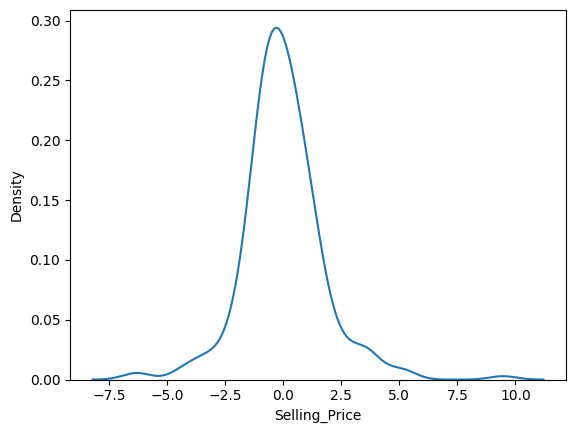

In [129]:
sns.kdeplot(residual_train)  

#### 1.2  histplot

<Axes: xlabel='Selling_Price', ylabel='Count'>

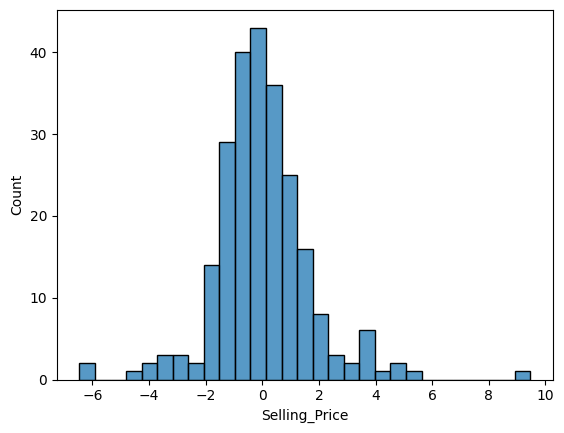

In [130]:
sns.histplot(residual_train)

#### 1.3  distplot

<Axes: xlabel='Selling_Price', ylabel='Density'>

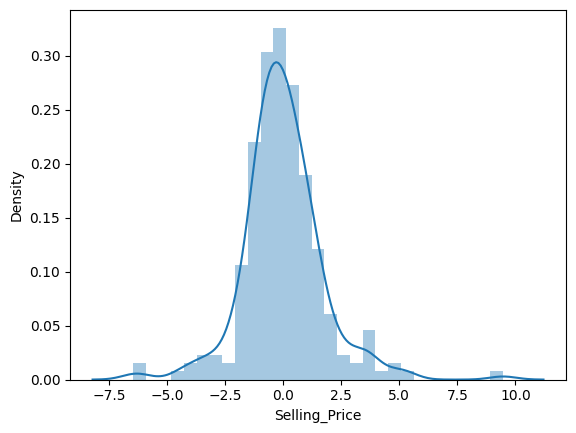

In [131]:
sns.distplot(residual_train)

#### 2. QQ-Plot

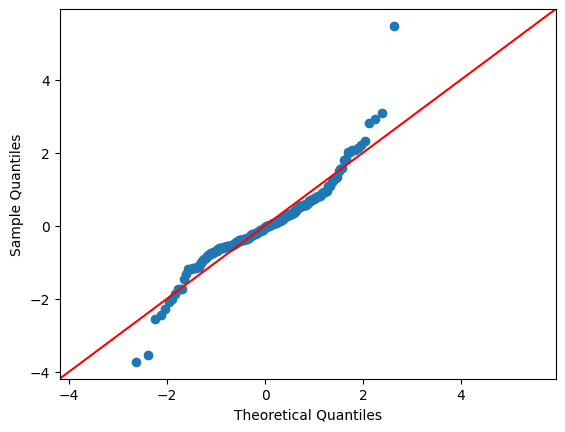

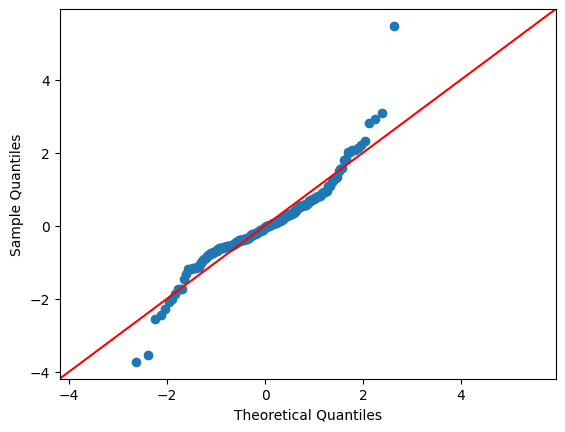

In [132]:
sm.qqplot(residual_train,line="45",fit=True)

#### 3. Hypothesis Testing:

#### 3.1.shapiro

In [133]:
_,p_val=shapiro(residual_train)
print("val",p_val)
if p_val > 0.5 :
    print("Null Hy hypothesis true")
    print("data normally distributed")
else:
    print("Alternate hypothesis is True")
    print("data not normally distributed")

val 1.4649554902490536e-09
Alternate hypothesis is True
data not normally distributed


#### 3.  2. kstest test

In [134]:
_,p_val=kstest(residual_train,"norm")
print("val",p_val)
if p_val > 0.5 :
    print("Null Hy hypothesis true")
    print("data normally distributed")
else:
    print("Alternate hypothesis is True")
    print("data not normally distributed")

val 0.02747111875636543
Alternate hypothesis is True
data not normally distributed


#### 3. normal test

In [135]:
_,p_val=normaltest(residual_train)
print("val",p_val)
if p_val > 0.5 :
    print("Null Hy hypothesis true")
    print("data normally distributed")
else:
    print("Alternate hypothesis is True")
    print("data not normally distributed")

val 5.858317227329977e-11
Alternate hypothesis is True
data not normally distributed


#### 4. Skewness:

#### skewness

In [138]:
mean=residual_train.mean()
median=residual_train.median()
skew=residual_train.skew()
print("mean: ",mean)
print("median: ",median)
print("skew: ",skew)

if mean>median:
    print("positive skewed data")
    print("skew:",skew)
elif mean<median:
    print("Negativly skewed data")
    print("skew:",skew)
else:
    print("Symmetric skewed data")
    print("skew:",skew)
    

mean:  7.451446866942509e-14
median:  -0.08591494850765002
skew:  0.6055122148235343
positive skewed data
skew: 0.6055122148235343


<Axes: xlabel='Selling_Price', ylabel='Density'>

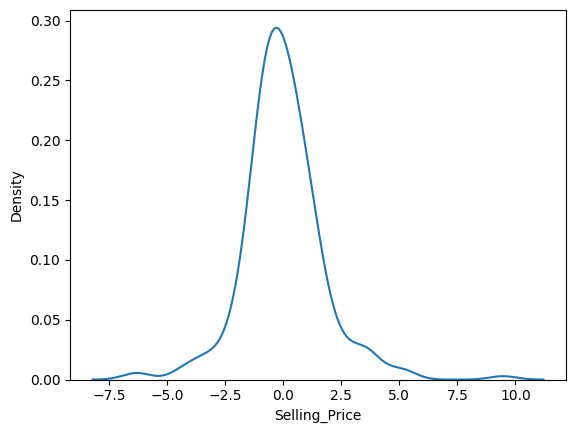

In [139]:
sns.kdeplot(residual_train)

### Single Row Testing

In [140]:
x_test[10:11]

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
257,2015,13.6,40324,1,1,0,0,0,1


In [141]:
Year             =2015
Present_Price    =13.6
Kms_Driven       =40324
Fuel_Type        ="Petrol"
Seller_Type      ="Dealer"
Transmission     ="Manual"
Owner            =0


In [142]:
column_names=x.columns.tolist()
column_names

['Year',
 'Present_Price',
 'Kms_Driven',
 'Seller_Type',
 'Transmission',
 'Owner',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol']

In [143]:
x.shape[1]

9

In [144]:
liner_reg.n_features_in_

9

In [157]:
x[15:16]

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
15,2016,10.79,43000,1,1,0,0,1,0


In [163]:
Year             =2016
Present_Price    =10.79
Kms_Driven       =43000
Fuel_Type        ="Diesel"
Seller_Type      ="Dealer"
Transmission     ="Manual"
Owner            =0


Seller_Type      =Seller_Type_data[Seller_Type]
Transmission     =Transmission_data[Transmission]
Fuel_Type        ="Fuel_Type_"+Fuel_Type


Fuel_Type_index = column_names.index(Fuel_Type)
Fuel_Type_index

test_array=np.zeros([1,liner_reg.n_features_in_ ])


test_array[0,0] = Year
test_array[0,1] = Present_Price
test_array[0,2] = Kms_Driven

test_array[0,Fuel_Type_index] = 1

test_array[0,4] = Seller_Type
test_array[0,5] = Transmission
test_array[0,6] = Owner


predicted_charges =np.around(liner_reg.predict(test_array)[0],2)
predicted_charges

8.98

#### pickle and json creation

In [148]:
with open("linear_regression_car_dekho.pkl","wb") as f:
      pickle.dump(liner_reg,f)  

In [149]:
project_data = {"seller":new_data1,
             "transmission":new_data2,
                "Column Names" :column_names}


with open('car_dekho.json','w') as f:
    json.dump(project_data, f)

In [156]:
x[15:16]

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
15,2016,10.79,43000,1,1,0,0,1,0


In [150]:
new_data1

{'Dealer': 1, 'Individual': 0}

In [153]:
df["Seller_Type"].value_counts()

Seller_Type
1    195
0    106
Name: count, dtype: int64

In [151]:
new_data2

{'Manual': 1, 'Automatic': 0}

In [152]:
df["Transmission"].value_counts()

Transmission
1    261
0     40
Name: count, dtype: int64